In [1]:
# Gamma And Regularization
# Gamma - talks about number of points to consider. 
# Regularization - talks about overfitting or under fitting.

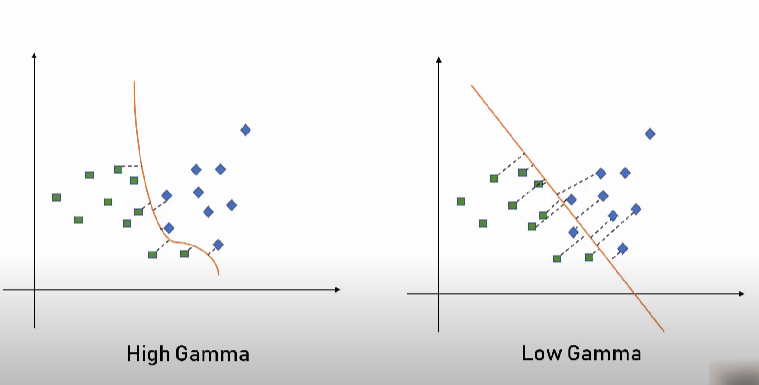

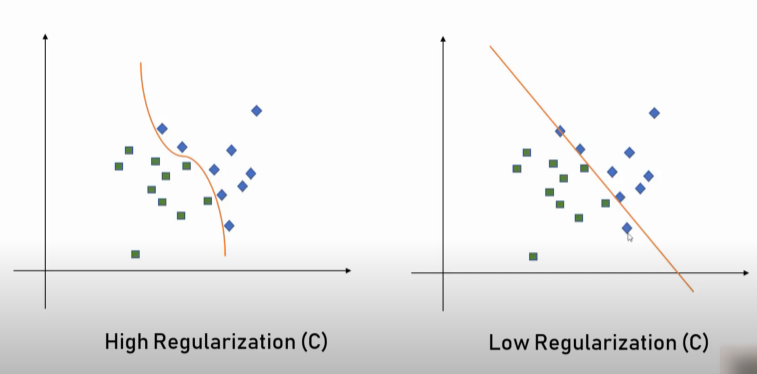

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
# counting number of 1s
df[df.target == 1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [12]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

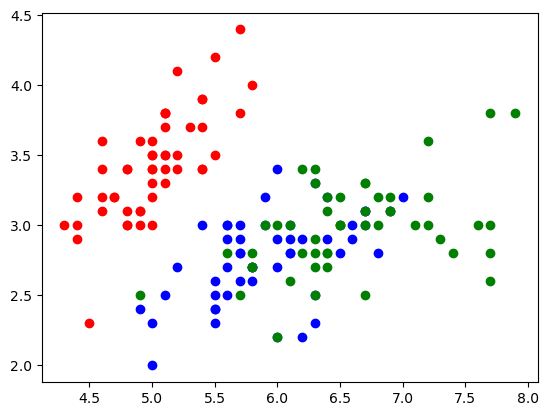

In [21]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = "red")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = "blue")
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = "green")

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['flower_name','target'], axis=1), df.target)

In [26]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [27]:
y_pred = model.predict(X_test)

Text(33.22222222222222, 0.5, 'True')

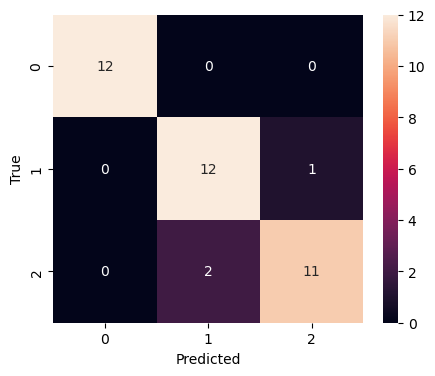

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sn
plt.figure(figsize = (5,4))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [30]:
model.score(X_test, y_test) # gives accuracy.

0.9210526315789473